# Vem Ser Tech | Dados - Turma 1105
## Projeto Final - Módulo de Estatística

##### Alunos: Alan Henrique C. Silva, Iago Fonseca M. Pereira, Lisnane Vitória de Oliveira, Márcia Oliveira, Tamira Aboganem, Wilza V. da Silva



### Introdução - Desvendando os Números da Sorte



Neste projeto de estatística, mergulhamos em um conjunto de dados intrigante, revelando segredos por trás dos sorteios de uma loteria. Começamos descrevendo e compreendendo as variáveis, importando as bibliotecas necessárias e realizando a visualização e limpeza dos dados. Em seguida, exploramos a estatística descritiva para entender padrões e tendências. Criamos visualizações gráficas para dar vida aos dados e calculamos probabilidades para iluminar as chances de diferentes eventos ocorrerem. Assim, desvendamos o mistério por trás dos números da sorte, deixando um legado de descobertas e insights para futuras investigações.

###  Descrição das Variáveis

- Qualitativa Nominal:

**Concurso:** Representa o número do concurso da Mega Sena. Não há uma ordem específica entre os números dos concursos, apenas os identifica de forma única.

- Quantitativa Discreta:

**Bola1, Bola2, Bola3, Bola4, Bola5, Bola6:** Representam os números sorteados em cada bola. São discretas porque são valores individuais e separados, que podem ser contados e enumerados.

- Quantitativa Contínua:

**Data do Sorteio:** Pode ser considerada uma variável quantitativa contínua se tratada temporalmente. As datas podem ser medidas em uma escala de tempo contínua, onde os valores podem ser fracionários e podem variar de forma contínua.

### Realizando as importações necessárias:

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from collections import Counter


### Vizualização Limpeza da Base de Dados

Vamos verificar se existe algum valor ausente ou inconsistentes que precisam ser tratados, vamos iniciar realizando o carregamento do conjunto de dados e em seguida verificar se há algum valor ausente.

Carregando o dataset:

In [5]:
mega_sena = pd.read_csv('mega_sena.csv')


Visualizando as primeiras 5 linhas do dataset

In [6]:
mega_sena.head()

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
0,1.0,11/03/1996,4,5,30,33,41,52
1,2.0,18/03/1996,9,37,39,41,43,49
2,3.0,25/03/1996,10,11,29,30,36,47
3,4.0,01/04/1996,1,5,6,27,42,59
4,5.0,08/04/1996,1,2,6,16,19,46


Visualizando as ultimas 5 linhas do dataset

In [7]:
mega_sena.tail()

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
2691,2692.0,24/02/2024,9,33,45,55,56,59
2692,2693.0,27/02/2024,11,29,44,45,46,50
2693,2694.0,29/02/2024,7,20,22,29,41,58
2694,2695.0,02/03/2024,15,17,32,33,34,40
2695,NaN,NaN,258,57,51,94,15,255


Verificando o Número de Linhas e Colunas

In [8]:
linhas, colunas = mega_sena.shape
print(f'O dataset possui {linhas} linhas e {colunas} colunas')

O dataset possui 2696 linhas e 8 colunas


Agora vamos vizualizar algumas informações sobre o dataset:

In [9]:
mega_sena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Concurso         2695 non-null   float64
 1   Data do Sorteio  2695 non-null   object 
 2   Bola1            2696 non-null   int64  
 3   Bola2            2696 non-null   int64  
 4   Bola3            2696 non-null   int64  
 5   Bola4            2696 non-null   int64  
 6   Bola5            2696 non-null   int64  
 7   Bola6            2696 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 168.6+ KB


Verificando a soma dos valores nulos do dataset

In [10]:
mega_sena.isnull().sum()

Concurso           1
Data do Sorteio    1
Bola1              0
Bola2              0
Bola3              0
Bola4              0
Bola5              0
Bola6              0
dtype: int64

É possível verificar que existe uma linha que possui os valores de concurso e data do sorteio nulos, para efeitos do nosso trabalho esta unica linha será desconsiderada. A seguir vamos eliminar esta linha.

In [11]:
mega_sena = mega_sena.dropna(subset=['Concurso', 'Data do Sorteio'])
print(mega_sena.isnull().sum())

Concurso           0
Data do Sorteio    0
Bola1              0
Bola2              0
Bola3              0
Bola4              0
Bola5              0
Bola6              0
dtype: int64


###Estátistica Descretiva (Análise Univariada e Multivariada)

Neste item vamos realizar análises estatísticas descritivas de posição das variáveis individualmente e em conjunto para entender padrões e relações.
No entanto, nossa opções de análises de posição são limitadas, pois informações como amplitude, variância e desvio padrão podem ser aplicadas a elementos do conjunto, porém não ao conjunto dos dados.

In [12]:
mega_sena.describe()

,Concurso,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
count,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000
mean,1348.000000,8.610019,17.341373,26.379592,35.086085,43.562152,52.176994
std,778.123812,6.980648,9.131717,9.969193,9.766388,9.031894,7.001871
min,1.000000,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,674.500000,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,1348.000000,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,2021.500000,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,2695.000000,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000


In [13]:
mega_sena['Data do Sorteio'] = pd.to_datetime(mega_sena['Data do Sorteio'], format='%d/%m/%Y')

<ipython-input-13-d895191b8184>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_sena['Data do Sorteio'] = pd.to_datetime(mega_sena['Data do Sorteio'], format='%d/%m/%Y')


In [14]:
matriz_corr = mega_sena.iloc[:, 2:].corr()
matriz_corr

,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
Bola1,1.000000,0.638257,0.456850,0.354147,0.247608,0.163720
Bola2,0.638257,1.000000,0.710803,0.532823,0.392101,0.262657
Bola3,0.456850,0.710803,1.000000,0.755799,0.561438,0.367143
Bola4,0.354147,0.532823,0.755799,1.000000,0.735601,0.491695
Bola5,0.247608,0.392101,0.561438,0.735601,1.000000,0.656915
Bola6,0.163720,0.262657,0.367143,0.491695,0.656915,1.000000


#### Vizualizações Gráficas

Agora vamos criar gráficos para ilustrar os padrões identificados e facilitar a compreensão dos dados.

O histograma a seguir mostra a quantidade de vezes que cada elemento foi sorteado. Podemos perceber que alguns elementos foram mais sorteados que outros.
Os números 10 e 53 foram sorteados mais de 300 vezes.
Já os números 21, 26 e 55 foram os menos sorteados, menos de 230 vezes cada.
Podemos observar que a distribuição é irregular.



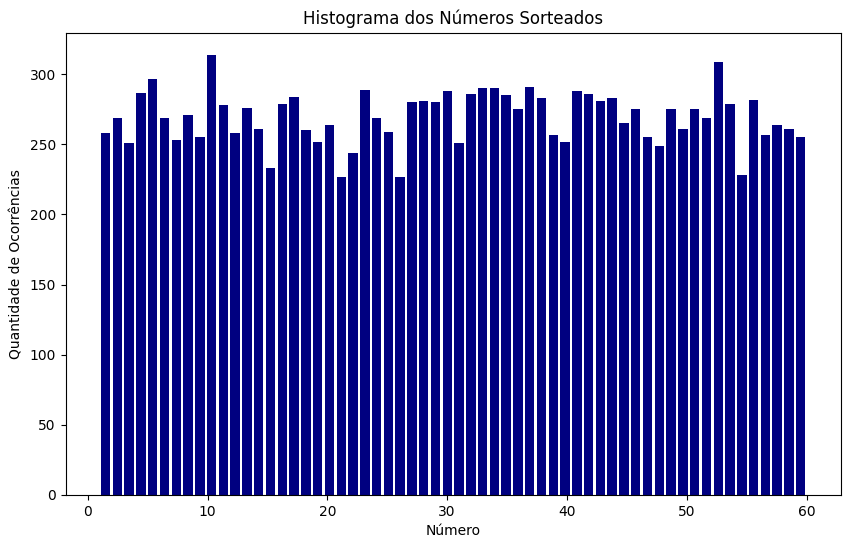

In [15]:
plt.figure(figsize=(10, 6))
mega_sena.iloc[:, 2:].stack().hist(bins=60, color='navy', rwidth = 0.8)
plt.title('Histograma dos Números Sorteados')
plt.xlabel('Número')
plt.ylabel('Quantidade de Ocorrências')
plt.grid(False)
plt.show()

Se ordenarmos os dados por quantidade de vezes sorteadas, em ordem descrescente, podemos confirmar com precisão a quantidade de sorteios para cada número.
Agora podemos afirmar que o número 10 é o de maior frequência nos sorteios: 315 vezes. 5 vezes mais que o segundo colocado, número 53. Tão próximo, mas tão distante está o número 55, antepenúltimo colocado, tendo sido sorteado somente 229 vezes e na frente apenas dos números 21 e 26, cada um sorteado 228 vezes.

In [16]:
numeros_de_1_a_60 = range(1, 61)
ocorrencias_por_numero = {}

for numero in numeros_de_1_a_60:
    ocorrencias_booleanas = mega_sena.apply(lambda row: numero in row.values, axis=1)
    quantidade_de_ocorrencias = ocorrencias_booleanas.sum()
    ocorrencias_por_numero[numero] = quantidade_de_ocorrencias

In [17]:
resultado_ordenado = sorted(ocorrencias_por_numero.items(), key=lambda x: x[1], reverse=True)

In [18]:
todos_numeros_e_ocorrencias = pd.DataFrame(resultado_ordenado, columns=['Número', 'Quantidade'])

print("Número: Quantidade de Ocorrências")
print("-" * 10)
for numero, ocorrencias in resultado_ordenado:
    print(f"{numero:10}:{ocorrencias:10} vezes")

Número: Quantidade de Ocorrências
----------
        10:       315 vezes
        53:       310 vezes
         5:       298 vezes
        37:       292 vezes
        34:       291 vezes
        23:       290 vezes
        33:       290 vezes
        30:       289 vezes
        41:       289 vezes
         4:       288 vezes
        32:       287 vezes
        42:       287 vezes
        35:       286 vezes
        17:       285 vezes
        38:       284 vezes
        44:       283 vezes
        56:       283 vezes
        28:       282 vezes
        43:       282 vezes
        27:       281 vezes
        29:       281 vezes
        16:       280 vezes
        54:       280 vezes
        11:       279 vezes
        13:       277 vezes
        36:       276 vezes
        49:       276 vezes
        51:       276 vezes
        46:       275 vezes
         8:       272 vezes
         2:       270 vezes
         6:       270 vezes
        24:       270 vezes
        52:       270 vezes
   

A seguir trazemos uma matriz de correlação.
Muito embora tenhamos encontrado uma correlação entre as bolas do sorteio, vale a consideração:
Será que existe, realmente, uma correlação aqui? Ou seja, o sorteio das bolas 3 e 4 é fortemente dependente um do outro?
Não nos parece ser o caso e esse é um bom exemplo de que os dados por si só não são suficientes e de que é fundamental fazer uma análise cautelosa sobre os resultados obtidos.

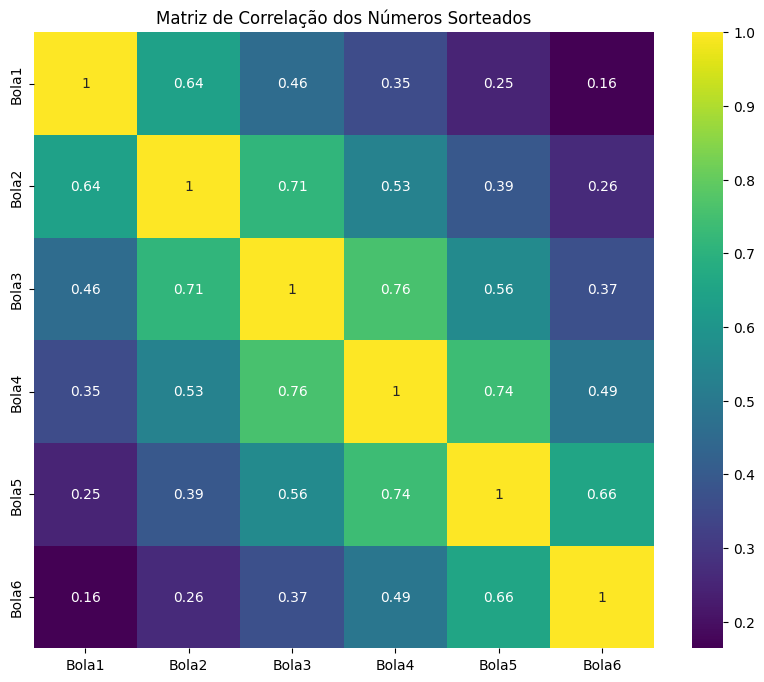

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='viridis')
plt.title('Matriz de Correlação dos Números Sorteados')
plt.show()

A seguir realizamos a vizualização por meio do boxplot das bolas sorteadas. Com a vizualização é possível verificar os números que são sorteados com menos frequência (outliers), também é possível realizar comparação das distribuições das bolas sorteadas permite identificar se há alguma bola que tende a ter números mais altos ou mais baixos.

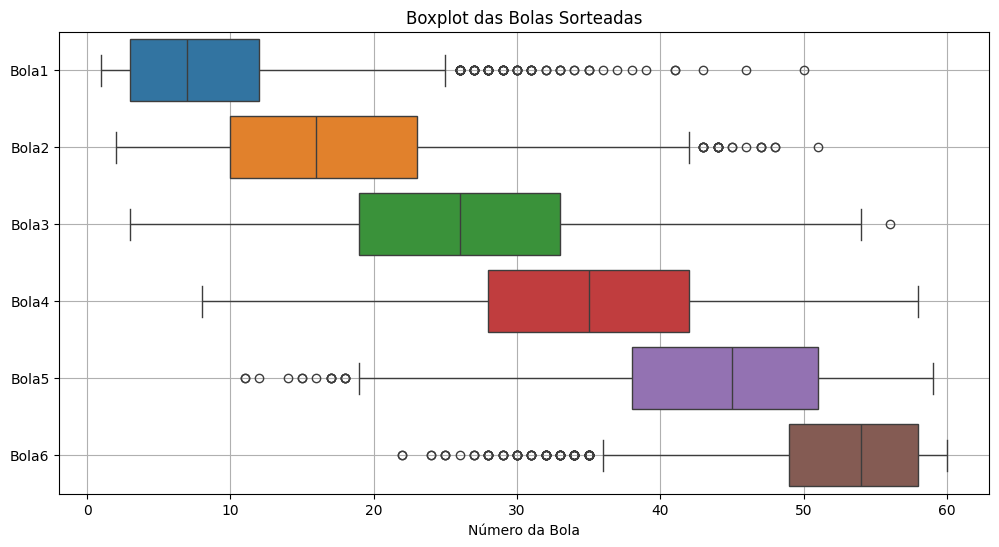

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']], orient='h')
plt.xlabel('Número da Bola')
plt.title('Boxplot das Bolas Sorteadas')
plt.grid(True)
plt.show()

### Probabilidade

Agora vamos realizar o calculo de algumas probabilidades.

Probabilidade de acertar os seis números em um único bilhete

In [21]:
total_de_numeros = 60
probabilidade_seis_numeros = 1 / (total_de_numeros ** 6)

print(f"A probabilidade de acertar os seis números em um único bilhete é de aproximadamente {probabilidade_seis_numeros:.20f}.")

A probabilidade de acertar os seis números em um único bilhete é de aproximadamente 0.00000000002143347051.


Probabilidade de um concurso ter 3 números pares e 3 ímpares

In [22]:
from math import comb

In [23]:
total_de_numeros = 60
total_de_combinacoes = comb(total_de_numeros, 6)
combinacoes_pares_impares = comb(30, 3) * comb(30, 3)

probabilidade = combinacoes_pares_impares / total_de_combinacoes
print(f"A probabilidade de um concurso ter 3 números pares e 3 números ímpares é de aproximadamente {probabilidade:.10f}.")


A probabilidade de um concurso ter 3 números pares e 3 números ímpares é de aproximadamente 0.3292514800.


Agora vamos descobrir as 6 dezenas com maior probabilidade de serem sorteadas.

In [24]:
total_sorteios = len(mega_sena)

In [25]:
probabilidades_numeros = {}
for numero in range(1, 61):
    ocorrencias_numero = mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values.flatten().tolist().count(numero)
    probabilidade_numero = ocorrencias_numero / total_sorteios
    probabilidades_numeros[numero] = probabilidade_numero

In [26]:
probabilidades_ordenadas = sorted(probabilidades_numeros.items(), key=lambda x: x[1], reverse=True)

In [27]:
print("Os 6 números com maior probabilidade de serem sorteados:")
for numero, probabilidade in probabilidades_ordenadas[:6]:
    print(f'Número {numero}: Probabilidade {probabilidade:.4f}')

Os 6 números com maior probabilidade de serem sorteados:
Número 10: Probabilidade 0.1165
Número 53: Probabilidade 0.1147
Número 5: Probabilidade 0.1102
Número 37: Probabilidade 0.1080
Número 33: Probabilidade 0.1076
Número 34: Probabilidade 0.1076


Calculando a probabilidade de todos os 6 números com maior probabilidade serem sorteados no mesmo sorteio

In [28]:
probabilidade_combinacao = 1
for numero, probabilidade in probabilidades_ordenadas[:6]:
    probabilidade_combinacao *= probabilidade

print(f'A probabilidade de todos os 6 números com maior probabilidade serem sorteados no mesmo sorteio é: {probabilidade_combinacao:.10f}')


A probabilidade de todos os 6 números com maior probabilidade serem sorteados no mesmo sorteio é: 0.0000018407


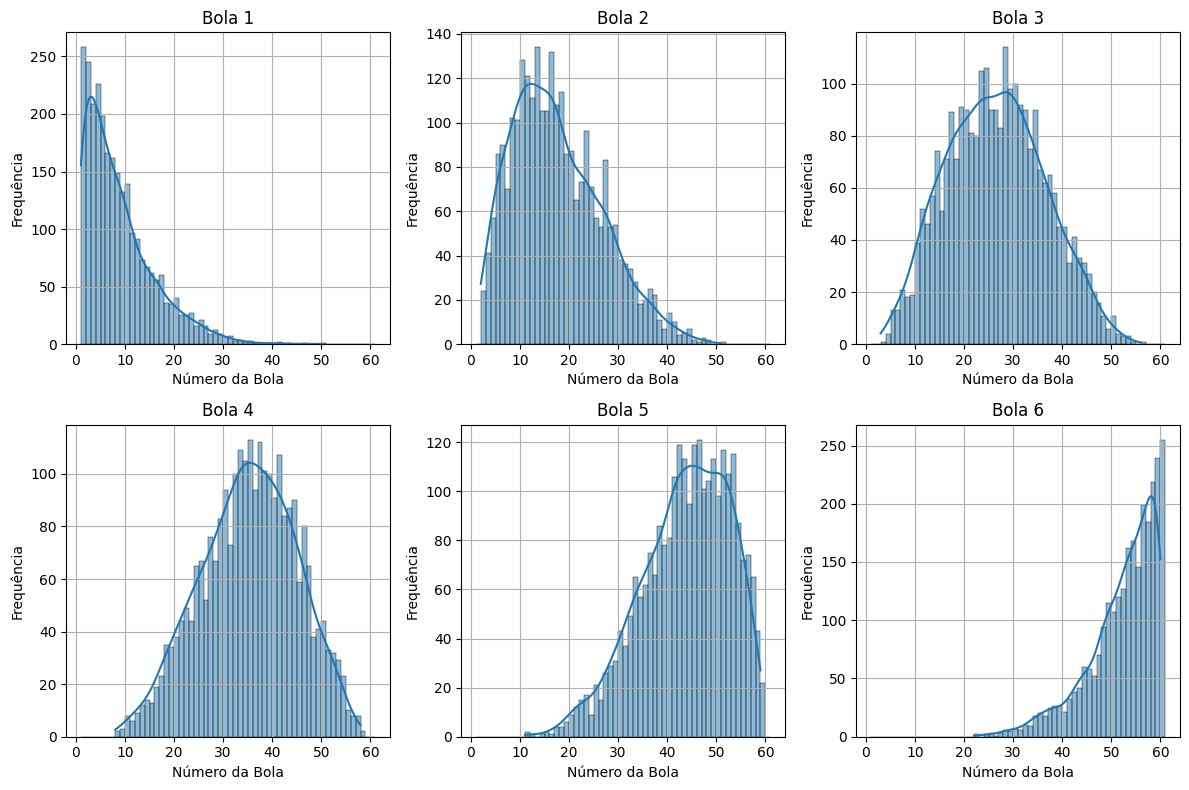

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(mega_sena.iloc[:, i + 2], bins=range(1, 62, 1), kde=True, ax=ax)
    ax.set_title(f'Bola {i + 1}')
    ax.set_xlabel('Número da Bola')
    ax.set_ylabel('Frequência')
    ax.grid(True)

plt.tight_layout()
plt.show()

### Teste de hipótese

Com um valor-p de 0.0001, que é muito menor que o nível de significância padrão de 0.05, rejeitamos a hipótese nula. Isso significa que há evidências estatísticas suficientes para concluir que a média dos números sorteados na Mega Sena não é igual a 30.

In [30]:
numeros_sorteados = mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values.flatten()
media_teste = 30
statistic, p_value = ttest_1samp(numeros_sorteados, media_teste)


In [31]:
print("Resultados do Teste de Hipótese:")
print(f"Estatística do Teste: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

Resultados do Teste de Hipótese:
Estatística do Teste: 3.8746
Valor p: 0.0001


In [32]:
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Rejeitamos a hipótese nula.


### Modelo de Florestra Aleatória

É importante interpretar esse valor considerando a escala dos dados. Dado que estamos lidando com a previsão de números sorteados na Mega Sena, onde os números têm uma escala relativamente pequena (de 1 a 60), um MSE de 83.93 pode ser considerado alto. Isso sugere que o modelo pode não estar capturando completamente os padrões nos dados ou que o problema de prever os números da Mega Sena é intrinsecamente desafiador devido à sua natureza altamente aleatória. Portanto, mesmo que o MSE seja relativamente baixo, ainda podemos considerar o desempenho do modelo com cautela e continuar procurando maneiras de melhorá-lo.

In [33]:
X = mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].values
y = mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].shift(-1).values

X = X[:-1]
y = y[:-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = RandomForestRegressor(n_estimators=10000, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(n_estimators=10000, random_state=42)

In [37]:
previsoes = model.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, previsoes)
print(f"Erro médio quadrático (MSE): {mse:.4f}")

Erro médio quadrático (MSE): 83.9329


In [40]:
proximos_numeros = model.predict(ultimos_numeros_sorteados)

proximos_numeros_inteiros = np.round(proximos_numeros).astype(int)

print("Previsão para os próximos números do sorteio:")
print(proximos_numeros_inteiros)


Previsão para os próximos números do sorteio:
[[ 7 16 26 34 44 53]]


### Quais foram as sequencias mais sorteadas?

É possível observar que nenhuma sequência foi sorteada mais de uma vez.

In [44]:
sequencias = mega_sena[['Bola1', 'Bola2', 'Bola3', 'Bola4', 'Bola5', 'Bola6']].apply(tuple, axis=1)
frequencia_sequencias = Counter(sequencias)
sequencias_sorteadas = frequencia_sequencias.most_common(10)

In [45]:

print("As 10 primeiras sequências mais sorteadas:")
for sequencia, frequencia in sequencias_sorteadas:
    print(f"Sequência: {sequencia}, Frequência: {frequencia}")


As 10 primeiras sequências mais sorteadas:
Sequência: (4, 5, 30, 33, 41, 52), Frequência: 1
Sequência: (9, 37, 39, 41, 43, 49), Frequência: 1
Sequência: (10, 11, 29, 30, 36, 47), Frequência: 1
Sequência: (1, 5, 6, 27, 42, 59), Frequência: 1
Sequência: (1, 2, 6, 16, 19, 46), Frequência: 1
Sequência: (7, 13, 19, 22, 40, 47), Frequência: 1
Sequência: (3, 5, 20, 21, 38, 56), Frequência: 1
Sequência: (4, 17, 37, 38, 47, 53), Frequência: 1
Sequência: (8, 43, 54, 55, 56, 60), Frequência: 1
Sequência: (4, 18, 21, 25, 38, 57), Frequência: 1
